# 📩 SMS Spam Classifier using Machine Learning

In today’s digital world, unsolicited spam messages are more than just annoying — they can be malicious and costly. In this project, we build a powerful yet lightweight **SMS Spam Classifier** using traditional NLP techniques and machine learning.

This notebook covers the complete pipeline:
- Loading and cleaning the SMS dataset
- Text preprocessing with tokenization, stopword removal, and stemming
- Feature extraction using **TF-IDF Vectorization**
- Training a **Multinomial Naive Bayes** classifier
- Evaluating model performance
- Saving the model and vectorizer
- And finally, deploying the model with an interactive **Streamlit web app**

> ✅ Objective: Detect whether a given text message is **Spam** or **Not Spam**, along with prediction confidence.

Let's get started! 🚀


In [182]:
import numpy as np 
import pandas as pd

In [183]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [184]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
360,ham,Ha ha cool cool chikku chikku:-):-DB-),NaN,NaN,NaN
5383,ham,Good day to You too.Pray for me.Remove the tee...,NaN,NaN,NaN
327,ham,"I'd say that's a good sign but, well, you know...",NaN,NaN,NaN
1016,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,NaN,NaN,NaN
3900,ham,That depends. How would you like to be treated...,NaN,NaN,NaN


In [185]:
df.shape

(5572, 5)

In [186]:
# 1. Data Cleaning
# 2. EDA 
# 3. Text Preprocessing 
# 4. Model building 
# 5. Evaluation 
# 6. Improvement 
# 7. Website 
# 8. Deploy

# 1. Data Cleaning

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [188]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [189]:
df.sample(5)

,v1,v2
4124,ham,May b approve panalam...but it should have mor...
5012,ham,"Uncle G, just checking up on you. Do have a re..."
2463,ham,"Good afternoon, babe. How goes that day ? Any ..."
2103,ham,Its a site to simulate the test. It just gives...
1282,ham,Ever green quote ever told by Jerry in cartoon...


In [190]:
# Renaming the cols

df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
436,ham,"Ask g or iouri, I've told the story like ten t..."
792,ham,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE...
329,ham,I'm reading the text i just sent you. Its mean...
965,ham,Or better still can you catch her and let ask ...
2167,ham,Yes.he have good crickiting mind


In [191]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [192]:
df['target'] = encoder.fit_transform(df['target'])

In [193]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- ham --> 0, spam --> 1

In [194]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [195]:
# check for duplicate values

df.duplicated().sum()

403

In [196]:
# remove duplicates

df = df.drop_duplicates(keep= 'first')

In [197]:
df.duplicated().sum()

0

In [198]:
df.shape

(5169, 2)

# 2. EDA

In [199]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [200]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

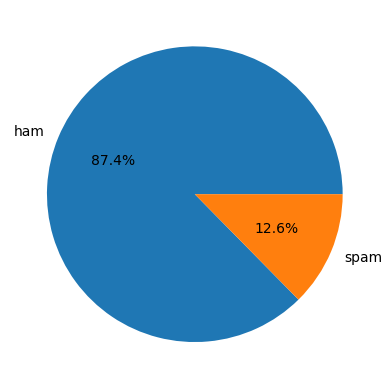

In [201]:
import matplotlib.pyplot as plt 

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [202]:
# Data is imbalanced

In [203]:
!pip install nltk

In [204]:
import nltk 

In [205]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to d:\anaconda3\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [206]:
df['num_characters'] = df['text'].apply(len)

In [207]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [208]:
# num of words

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [209]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [210]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) 

In [211]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [212]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [213]:
# ham 

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [214]:
# spam 

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

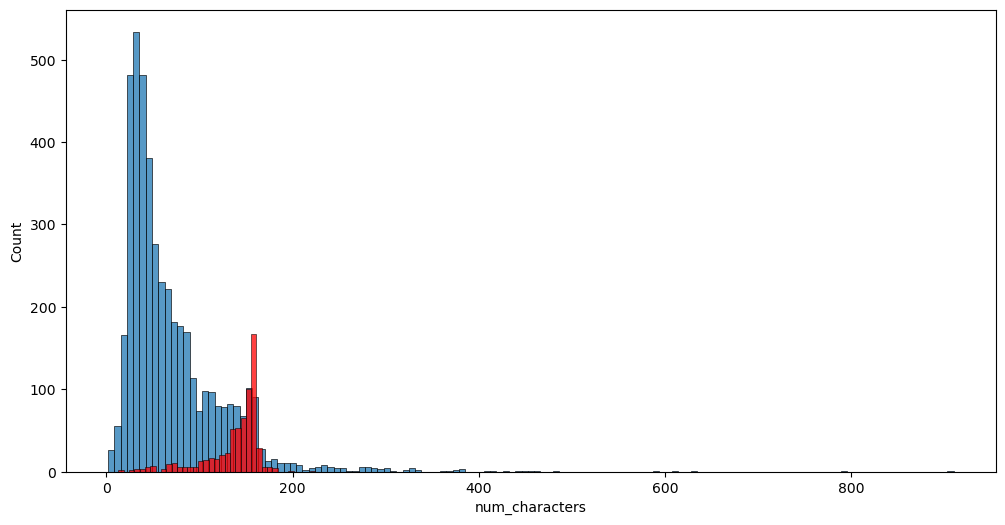

In [215]:
import seaborn as sns 

plt.figure(figsize=(12,6))

sns.histplot(data=df[df['target'] == 0], x='num_characters')
sns.histplot(data=df[df['target'] == 1], x= 'num_characters', color='red')

<Axes: xlabel='num_words', ylabel='Count'>

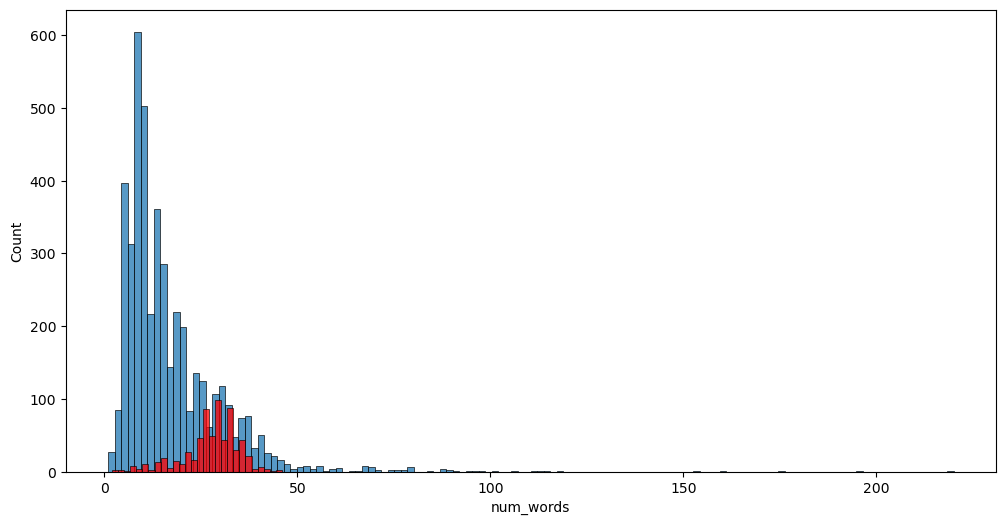

In [216]:
import seaborn as sns 

plt.figure(figsize=(12,6))

sns.histplot(data=df[df['target'] == 0], x='num_words')
sns.histplot(data=df[df['target'] == 1], x= 'num_words', color='red')

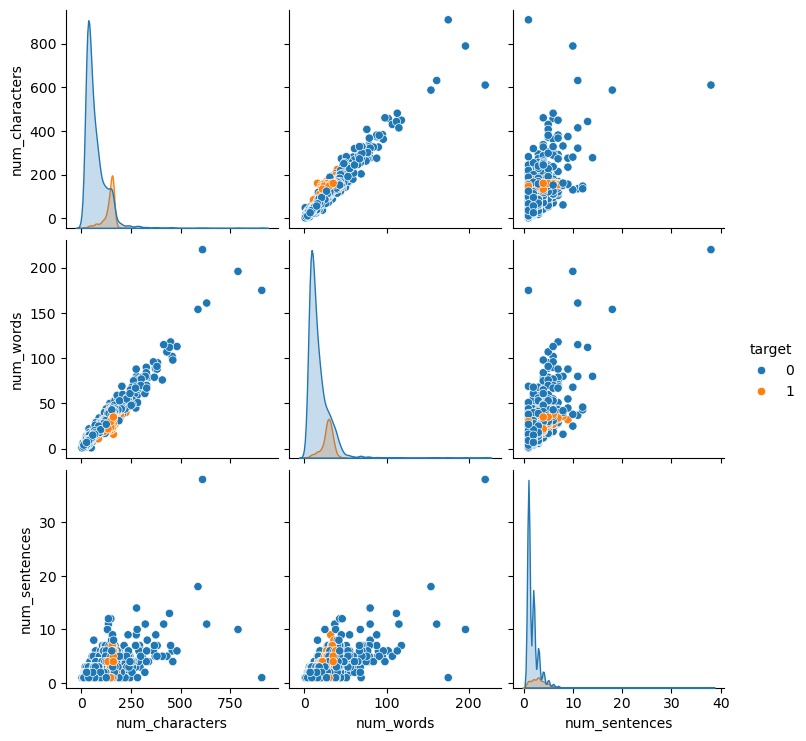

In [217]:
sns.pairplot(df, hue='target')

<Axes: >

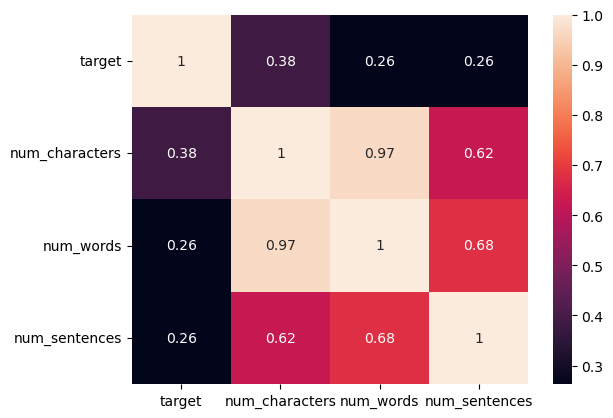

In [218]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


In [219]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


# 💡 One-Line Rule:

- "Choose features that are highly correlated with the target, but not with each other."

In [220]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df[['num_characters', 'num_words', 'num_sentences']]
y = df['target']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

print(dict(zip(X.columns, selector.scores_)))


{'num_characters': 897.6053932750267, 'num_words': 383.67947882071985, 'num_sentences': 386.9060839392064}


# 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation 
- Stemming 

In [221]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import string

ps = PorterStemmer()

def transform_text(text):
    # Step 1: Lowercase the text
    text = text.lower()
    
    # Step 2: Tokenize
    tokens = nltk.word_tokenize(text)

    # Step 3: Keep only alphanumeric tokens
    cleaned_tokens = []
    for word in tokens:
        if word.isalnum():
            cleaned_tokens.append(word)

    # Step 4: Remove stopwords and punctuation
    filtered_tokens = []
    for word in cleaned_tokens:
        if word not in stopwords.words('english') and word not in string.punctuation:
            filtered_tokens.append(word)

    # Step 5: Apply stemming
    stemmed_tokens = []
    for word in filtered_tokens:
        stemmed_tokens.append(ps.stem(word))

    # Step 6: Join tokens back to a string
    final_text = " ".join(stemmed_tokens)
    
    return final_text


In [222]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [223]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [224]:
df['transformed_text'] = df['text'].apply(transform_text)

In [225]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [226]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

| Method              | Purpose                   | Output                     |
| ------------------- | ------------------------- | -------------------------- |
| `.str.cat(sep=" ")` | Combines multiple strings | **One large string**       |
| `.str.split()`      | Breaks string into tokens | **List of lists of words** |


In [227]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

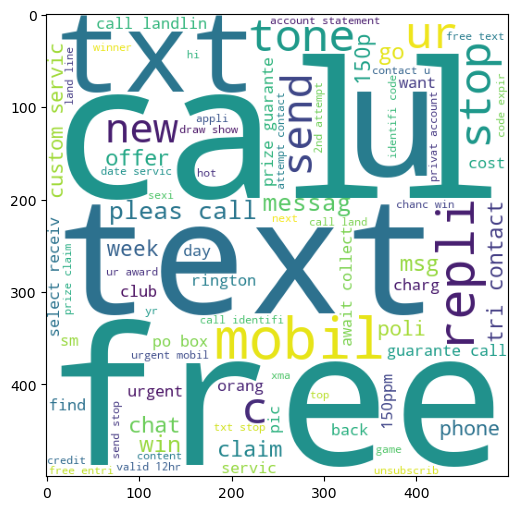

In [228]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [229]:
ham_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

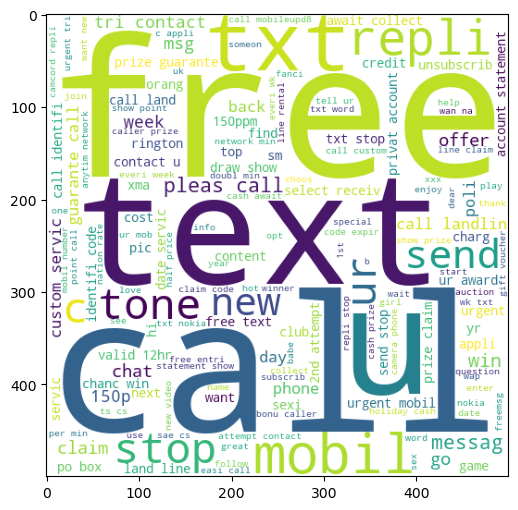

In [230]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [231]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [232]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [233]:
msg = "win free iphone" 

In [234]:
msg.split()

['win', 'free', 'iphone']

In [235]:
len(spam_corpus)

9939

In [236]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [237]:
# Count the top 30 most common words in spam_corpus
word_counts = Counter(spam_corpus).most_common(30)

# Convert to DataFrame for better readability
word_freq_df = pd.DataFrame(word_counts, columns=['word', 'count'])

In [238]:
word_freq_df

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\Dell\AppData\Local\Temp\ipykernel_3712\398350523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq_df, x='word', y='count', palette='viridis')


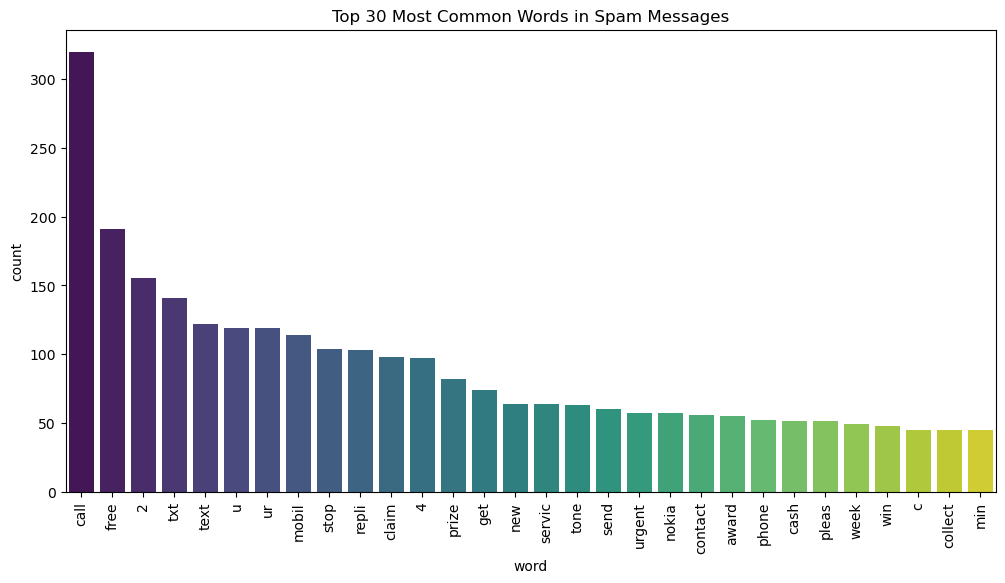

In [239]:
# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq_df, x='word', y='count', palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [240]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [241]:
len(ham_corpus)

35404

In [242]:
word_counts = Counter(ham_corpus).most_common(30)

word_freq_df = pd.DataFrame(word_counts, columns= ['word', 'count'])

In [243]:
word_freq_df

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\Dell\AppData\Local\Temp\ipykernel_3712\3657078998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq_df, x='word', y='count', palette='viridis')


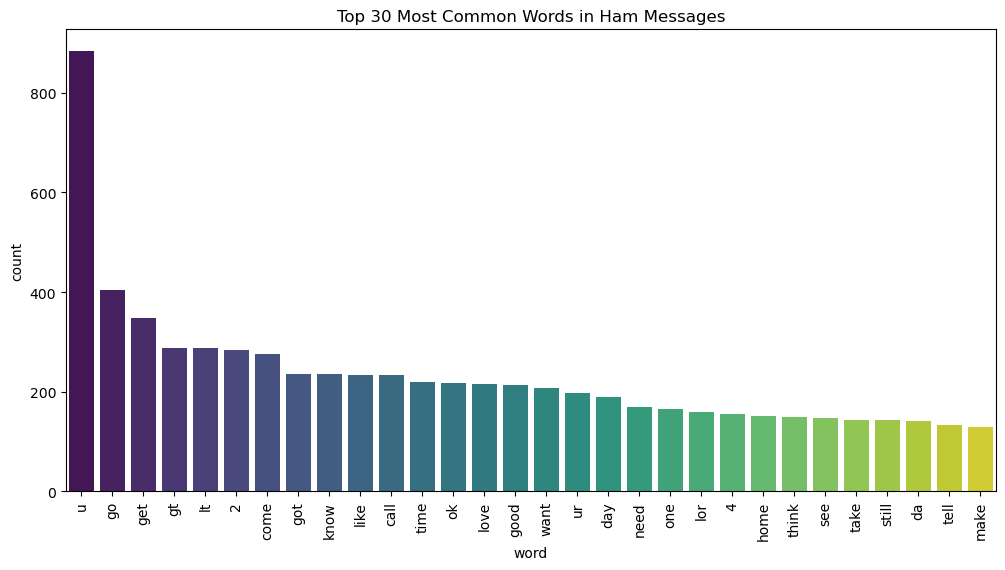

In [244]:
plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq_df, x='word', y='count', palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()

# 4. Model Building

- Text Vectorization
- Using Bag of Words

In [245]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [246]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [247]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [248]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [249]:
X.shape

(5169, 3000)

In [250]:
y = df['target'].values

In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [252]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [253]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [254]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [255]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [256]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [257]:
# tfidf --> MNB

In [259]:
import pickle 

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# ✅ Conclusion

In this project, we successfully built an end-to-end SMS spam detection system using:

- **Text preprocessing** (cleaning, stemming, stopwords)
- **TF-IDF vectorizer** to extract meaningful features from raw text
- **Multinomial Naive Bayes**, a classic algorithm that performs well on text data
- **Model accuracy ~98%** on test set

We also created a Streamlit-based interactive app where users can:
- Enter custom messages
- View the spam prediction and confidence
- Explore a word cloud of the most frequent spam terms

This solution is scalable and lightweight, making it ideal for integrating into real-world messaging platforms, customer support systems, or mobile applications.

> 💡 “Even your spam deserves machine learning.”

Thanks for reading — feel free to fork, improve, and deploy your own version!
